In [ ]:
from gcrnet.utils import simulate_data
from gcrnet.gcrnet import GCRNet
import numpy as np
import torch


# Simulation Example

## Prepare dataset

In [16]:
train_data=simulate_data(n_samples=300, n_features=20, data_type="classification")
test_data=simulate_data(n_samples=300, n_features=20, data_type="classification")

## Standardize dataset 

In [17]:
# # standardize dataset in real application
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# # Fit the scaler on the training data
# scaler.fit(train_data['X'])
# train_data['X'] = scaler.fit_transform(train_data['X'])
# test_data['X'] = scaler.fit_transform(test_data['X'])

## Instantiate the GCRNet trainer

In [18]:
lam=np.exp(np.linspace(np.log(0.001),np.log(0.5), 50))
gmcp_net = GCRNet(task_type='classification',device=torch.device("cpu"), input_dim=train_data['X'].shape[1], output_dim=1, hidden_dims=[10,5], activation="relu",
    optimizer="Adam",learning_rate=0.001, batch_size=train_data['X'].shape[0], 
    alpha=0.01, lam=lam, penalty="MCP",drop_input=True)



## Train model

In [19]:
#param_grid={'alpha':np.exp(np.linspace(np.log(0.001),np.log(0.1), 10))}
param_grid={'alpha':[0.02]}
gmcp_net= gmcp_net.fit_and_validate(X=train_data['X'], y=train_data['y'], 
                              param_grid=param_grid, num_epochs=200, verbose=True, print_interval=200)

Epoch: 200: loss=0.5892996886253357
Epoch: 400: loss=0.5286839106559753
Epoch: 600: loss=0.5113992789268493
Epoch: 800: loss=0.49933625249862673
Epoch: 1000: loss=0.4904348948478699
Epoch: 1200: loss=0.4854195812225342
Epoch: 1400: loss=0.4825494387626648
Epoch: 1600: loss=0.48127461462020876
Epoch: 1800: loss=0.4806892970085144
Epoch: 2000: loss=0.4804188111305237
Lambda0=0.0010000000000000002, size=20
Epoch: 200: loss=0.4802099401953266
Lambda1=0.0011352225791695506, size=20
Epoch: 200: loss=0.48031796276217337
Lambda2=0.0012887303042563671, size=20
Epoch: 200: loss=0.4804549972516614
Lambda3=0.0014629957398518724, size=20
Epoch: 200: loss=0.4806391412921762
Lambda4=0.001660825797108707, size=20
Epoch: 200: loss=0.4808756822122968
Lambda5=0.0018854069449450721, size=20
Epoch: 200: loss=0.48118940368959834
Lambda6=0.002140356534824727, size=20
Epoch: 200: loss=0.48158195493697187
Lambda7=0.002429781065806128, size=20
Epoch: 200: loss=0.4820805546524391
Lambda8=0.002758342328341774, si

## Solution path

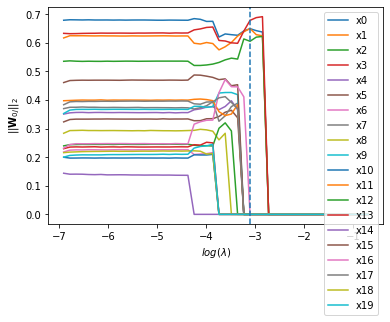

[ True  True  True  True False False False False False False False False
 False False False False False False False False]
best_lam=0.04491905539644121, best_params={'alpha': 0.02}


In [20]:
gmcp_net.plot_solution_path(legend=True, best=True)
print(gmcp_net.get_selection())
print(f'best_lam={gmcp_net.lam[gmcp_net.best_lam_ind]}, best_params={gmcp_net.best_params}')

## Evaluating the model

In [21]:
accuracy_train = gmcp_net.score(X=train_data['X'], y=train_data['y'], best=True)
accuracy_test=gmcp_net.score(X=test_data['X'], y=test_data['y'], best=True)
print(f'train_accuracy={accuracy_train} test_accuracy={accuracy_test}')

train_accuracy=0.7933333516120911 test_accuracy=0.7633333206176758


# Two-moon dataset

## Prepare dataset

In [31]:
from gcrnet.utils import create_twomoon_dataset
train_data=create_twomoon_dataset(n=500,p=20)
test_data=create_twomoon_dataset(n=500,p=20)

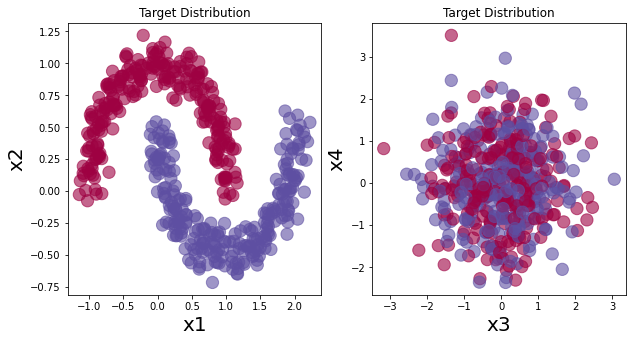

In [32]:
import matplotlib.pyplot as plt

figure, axes = plt.subplots(1, 2, figsize=(10, 5))

scatter1 = axes[0].scatter(x=train_data["X"][:, 0], y=train_data["X"][:, 1], s=150, c=train_data['y'], alpha=0.6, cmap=plt.cm.get_cmap('Spectral'))
axes[0].set_xlabel('x1', fontsize=20)
axes[0].set_ylabel('x2', fontsize=20)
axes[0].set_title('Target Distribution')

scatter2 = axes[1].scatter(x=train_data["X"][:, 2], y=train_data["X"][:, 3], s=150, c=train_data['y'], alpha=0.6, cmap=plt.cm.get_cmap('Spectral'))
axes[1].set_xlabel('x3', fontsize=20)
axes[1].set_ylabel('x4', fontsize=20)
axes[1].set_title('Target Distribution')

plt.tick_params(labelsize=10)

plt.show()


## Train model

In [33]:
lam=np.exp(np.linspace(np.log(0.001),np.log(0.5), 50))
gmcp_net = GCRNet(task_type='classification',device=torch.device("cpu"), input_dim=train_data['X'].shape[1], output_dim=1, hidden_dims=[10,5], activation="relu",
    optimizer="Adam",learning_rate=0.001, batch_size=train_data['X'].shape[0], 
    alpha=0.01, lam=lam, penalty="MCP",drop_input=True)
param_grid={'alpha':np.exp(np.linspace(np.log(0.001),np.log(0.1), 5))}
gmcp_net= gmcp_net.fit_and_validate(X=train_data['X'], y=train_data['y'], 
                              param_grid=param_grid, num_epochs=200, verbose=True, print_interval=200, n_jobs=5)

## Solution path

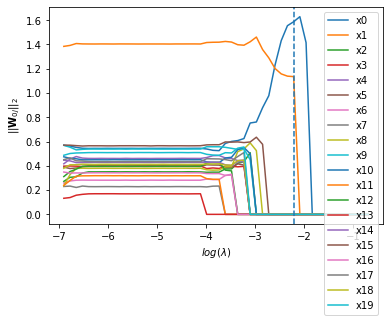

[ True  True False False False False False False False False False False
 False False False False False False False False]
best_lam=0.10914347029616946, best_params={'alpha': 0.010000000000000004}


In [34]:
gmcp_net.plot_solution_path(legend=True, best=True)
print(gmcp_net.get_selection())
print(f'best_lam={gmcp_net.lam[gmcp_net.best_lam_ind]}, best_params={gmcp_net.best_params}')

## Evaluating the model

In [35]:
accuracy_train = gmcp_net.score(X=train_data['X'], y=train_data['y'], best=True)
accuracy_test=gmcp_net.score(X=test_data['X'], y=test_data['y'], best=True)
print(f'train_accuracy={accuracy_train} test_accuracy={accuracy_test}')

train_accuracy=0.9279999732971191 test_accuracy=0.9340000152587891
